In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("cleaned_census.csv")
df.head(10)


age  workclass  education_level  education-num  marital-status  occupation  \
0   27          2               13              1               2           4   
1   63          4               12             14               2           4   
2   36          4               11              9               2           3   
3   18          2               11              9               4          10   
4   19          2               11              9               4           7   
5   55          4               11              9               0           3   
6   19          2                0              6               4           7   
7   46          2               12             14               0           3   
8   35          2                9             13               0           3   
9   47          3               14             15               0           9   

   race  sex  capital-gain  capital-loss  hours-per-week  native-country  \
0     4    0         41310             0              24              25   
1     4    0         41310             0              50              38   
2     1    0         41310             0              90              34   
3     4    0         34095             0               3              38   
4     4    1         34095             0              20              38   
5     4    0         34095             0              60              38   
6     4    1         34095             0              24              38   
7     4    1         27828             0              50              38   
8     4    0         27828             0              50              38   
9     4    0         27828             0              50              38   

   income  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       1  
8       1  
9       1

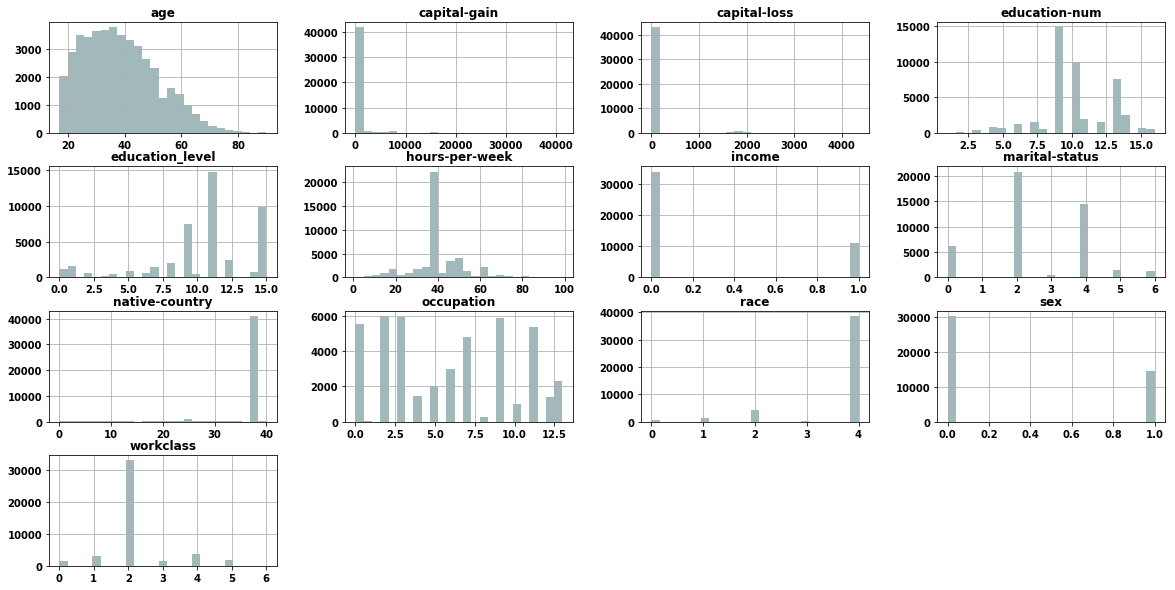

In [2]:
import matplotlib.pyplot as plt
df.hist(bins=25, grid=True, figsize=(20,10),color="#a2b9bc")
plt.show()

<module 'seaborn' from 'C:\\Python\\lib\\site-packages\\seaborn\\__init__.py'>

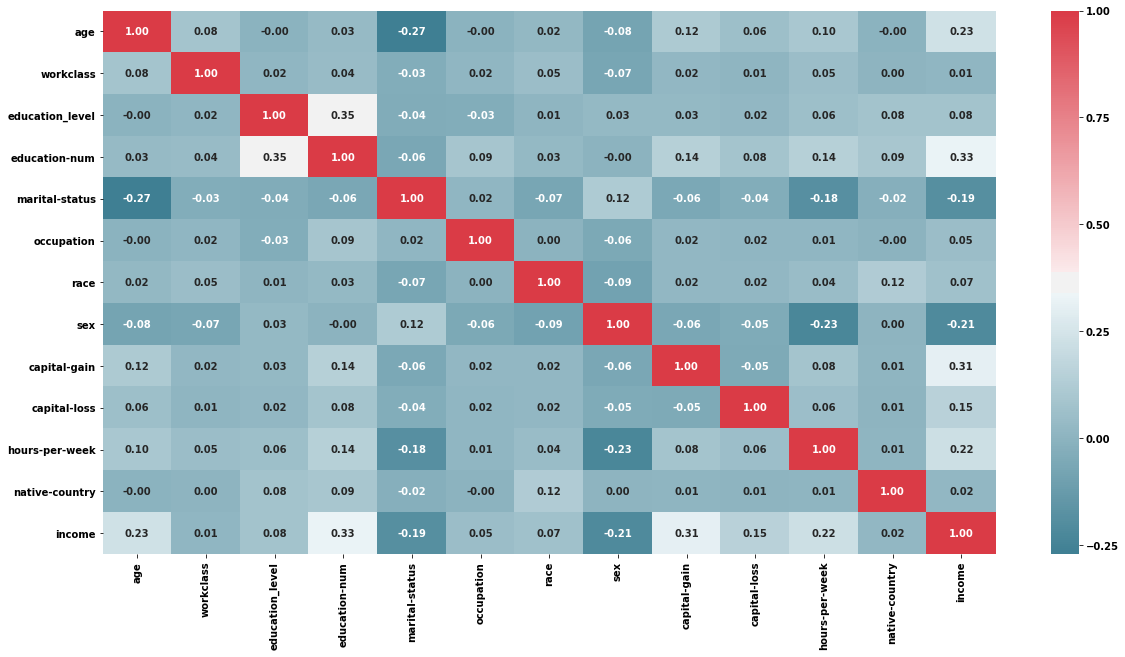

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = sns.diverging_palette(220, 10, as_cmap=True))
sns

In [4]:
#define X, Y
X = df.iloc[:, 0:12].values
y = df.iloc[:, 12].values

In [5]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [7]:
 # Transform the training and testing data using the X_scaler

X_train= X_scaler.fit_transform(X_train)
X_test= X_scaler.transform(X_test)

In [8]:
# create a deep neural network with 12 inputs, 6 hidden nodes, and 1 outputs
from keras.models import Sequential
from keras.layers import Dense

deep_model = Sequential()
deep_model.add(Dense(6, activation='relu', input_dim=12))
deep_model.add(Dense(6, activation='relu'))
deep_model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [9]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [10]:
#compile and train the model
deep_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history=deep_model.fit(
    X_train,
    y_train,
    validation_split=0.33,
    batch_size=10,
    epochs=100,
    shuffle=True
)

Instructions for updating:
Use tf.cast instead.
Train on 22608 samples, validate on 11136 samples
Epoch 1/100
22608/22608 [==============================] - 5s 206us/step - loss: 0.4221 - acc: 0.7911 - val_loss: 0.3587 - val_acc: 0.8320
Epoch 2/100
22608/22608 [==============================] - 4s 158us/step - loss: 0.3585 - acc: 0.8308 - val_loss: 0.3420 - val_acc: 0.8377
Epoch 3/100
22608/22608 [==============================] - 4s 181us/step - loss: 0.3500 - acc: 0.8342 - val_loss: 0.3377 - val_acc: 0.8402
Epoch 4/100
22608/22608 [==============================] - 4s 175us/step - loss: 0.3469 - acc: 0.8360 - val_loss: 0.3365 - val_acc: 0.8394
Epoch 5/100
22608/22608 [==============================] - 4s 170us/step - loss: 0.3453 - acc: 0.8369 - val_loss: 0.3341 - val_acc: 0.8398
Epoch 6/100
22608/22608 [==============================] - 4s 181us/step - loss: 0.3440 - acc: 0.8370 - val_loss: 0.3336 - val_acc: 0.8397
Epoch 7/100
22608/22608 [==============================] - 4s 156us/

22608/22608 [==============================] - 4s 165us/step - loss: 0.3299 - acc: 0.8458 - val_loss: 0.3220 - val_acc: 0.8471
Epoch 58/100
22608/22608 [==============================] - 4s 167us/step - loss: 0.3299 - acc: 0.8454 - val_loss: 0.3224 - val_acc: 0.8443
Epoch 59/100
22608/22608 [==============================] - 4s 167us/step - loss: 0.3298 - acc: 0.8452 - val_loss: 0.3214 - val_acc: 0.8453
Epoch 60/100
22608/22608 [==============================] - 4s 161us/step - loss: 0.3297 - acc: 0.8465 - val_loss: 0.3235 - val_acc: 0.8444
Epoch 61/100
22608/22608 [==============================] - 4s 170us/step - loss: 0.3299 - acc: 0.8461 - val_loss: 0.3225 - val_acc: 0.8460
Epoch 62/100
22608/22608 [==============================] - 4s 190us/step - loss: 0.3295 - acc: 0.8451 - val_loss: 0.3223 - val_acc: 0.8437
Epoch 63/100
22608/22608 [==============================] - 4s 179us/step - loss: 0.3295 - acc: 0.8458 - val_loss: 0.3227 - val_acc: 0.8466
Epoch 64/100
22608/22608 [=======

In [11]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


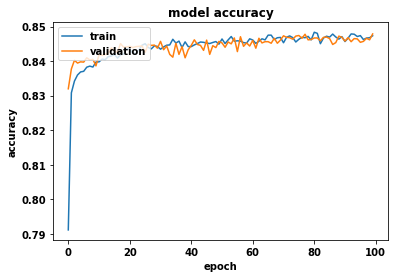

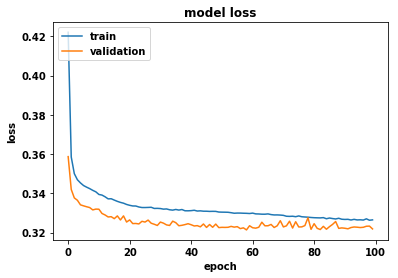

In [12]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
#evaluate the model
model_loss, model_accuracy = deep_model.evaluate(X_test, y_test)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

11249/11249 [==============================] - 0s 25us/step
Deep Neural Network - Loss: 0.3219092917559952, Accuracy: 0.8501200106888095


In [14]:
#predict
predictions = deep_model.predict(X_test[:5])
predictions = (predictions>0.5)

In [15]:
print(f"Predicted Income: {predictions}")
print(f"Actual Income: {list(y_test[:5])}")

Predicted Income: [[False]
 [False]
 [False]
 [False]
 [ True]]
Actual Income: [0, 0, 0, 0, 1]


In [16]:
import pickle

#creating and training a model
#serializing our model to a file called model.pkl
pickle.dump(deep_model, open("deep_model.pkl","wb"))